<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Linear-Regression/CEP_Linear_Regression_brainhead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Huge{\text{Linear Regression}}$

$\Large{\text{More examples}}$


In this session, we shall learn about some limitations of linear regression. 

Let us first consider a sample data, which will be useful for our study. 

In [1]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider a data set originally due to Anscombe.
The data set contains a predictor and response variable.

In [29]:
#Let us explore the data and the description 

#Get the data from the web 
brainhead_data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/brainhead.dat', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
brainhead_data.head()


,0,1,2,3
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [30]:
#if you wish to print the entire data, then use the following
print(brainhead_data)

     0  1     2     3
0    1  1  4512  1530
1    1  1  3738  1297
2    1  1  4261  1335
3    1  1  3777  1282
4    1  1  4177  1590
..  .. ..   ...   ...
232  2  2  3214  1110
233  2  2  3394  1215
234  2  2  3233  1104
235  2  2  3352  1170
236  2  2  3391  1120

[237 rows x 4 columns]


What do the numbers in the above data mean? Let us understand the data by seeing its description. 

In [31]:
import urllib.request   #this package is useful for accessing text files over internet 
brainhead_data_description_file = urllib.request.urlopen('http://users.stat.ufl.edu/~winner/data/brainhead.txt')


for line in brainhead_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

Dataset:  brainhead.dat



Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 

to the Size of the Head", Biometrika, Vol. 4, pp105-123



Description: Brain weight (grams) and head size (cubic cm) for 237

adults classified by gender and age group.



Variables/Columns

Gender   8   /* 1=Male, 2=Female  */

Age Range  16   /* 1=20-46, 2=46+  */

Head size (cm^3)  21-24

Brain weight (grams)  29-32





Having known the data description, let us insert the descriptions into the data now.

In [32]:
brainhead_data.columns = ['Gender', 'Age Range' , 'Head size' , 'Brain weight']

#check by printing the data again
brainhead_data.head(10)

,Gender,Age Range,Head size,Brain weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


Seeing the data as mere numbers might not be interesting. So, let us use some graphical ways to visualize the data. 

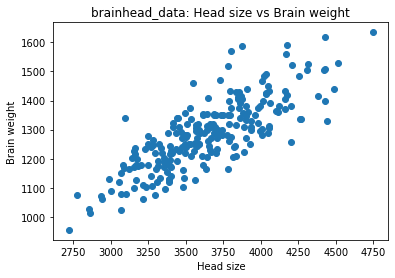

In [34]:
#We will plot a scatter plot of the math score vs tissue concentration 

plt.scatter(brainhead_data['Head size'], brainhead_data['Brain weight'])
plt.title("brainhead_data: Head size vs Brain weight")
plt.xlabel("Head size")
plt.ylabel("Brain weight")
plt.show()

$\large{\text{Question:}}$ Is the trend linear (or) at least linear looking? 

$\Large{\text{Computing } \beta_0, \beta_1 \text{ for the Anscombe data set 2}}:$

In [35]:
#Let us now compute beta_0 and beta_1 from the anscombe data set 2
n = len(brainhead_data.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 237


In [36]:
#First let us compute x_bar and y_bar 
x_bar = 0 
y_bar = 0

for i in range(n): #access each row from the data set 
  x_bar += float(brainhead_data.iat[i,2]) #access element at X column
  y_bar += float(brainhead_data.iat[i,3]) #access element at Y column
x_bar /= n
y_bar /= n
print('x bar:',x_bar, 'y bar:',y_bar)

x bar: 3633.9915611814345 y bar: 1282.873417721519


In [37]:
#Then we will compute Sigma_XX and Sigma_XY 
sigma_xx = 0
sigma_xy = 0

for i in range(n): #access each row from the data set 
  sigma_xx += (float(brainhead_data.iat[i,2]) - x_bar)**2 #computing (x^i - x_bar)^2 
  sigma_xy += (float(brainhead_data.iat[i,2]) - x_bar) * (float(brainhead_data.iat[i,3])-y_bar) #computing (x^i - x_bar)(y^i-y_bar)
print('sigma_xx:',sigma_xx, 'sigma_xy:',sigma_xy)

sigma_xx: 31486153.983122338 sigma_xy: 8294376.74683544


In [38]:
#Now we can compute beta_0 and beta_1
beta_1 = sigma_xy/sigma_xx
beta_0 = y_bar - beta_1* x_bar 

print('beta_0:', beta_0, 'beta_1', beta_1)


beta_0: 325.57342104944223 beta_1 0.26342933948939945


$\Large{\text{Plotting the regression line}}$
 
Having computed $\beta_0$ and $\beta_1$, we will now plot the line $y=\beta_1 x + \beta_0$ along with the points in the data set. 

In [40]:
#compute the left and right limits of the x-axis
x_min = 9999
x_max = -9999

for i in range(n): #access each row from the data set 
  x_i = float(brainhead_data.iat[i,2]) #access element at X column
  if x_i > x_max:
    x_max = x_i 
  if x_i < x_min:
    x_min = x_i

x_min = x_min - 1
x_max = x_max + 1 

print('x_min:',x_min,'x_max:',x_max)




x_min: 2719.0 x_max: 4748.0


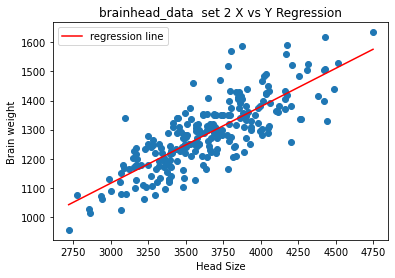

In [43]:
import numpy as np
x = np.linspace(x_min,x_max,100) #creates a series of points in x axis
y = beta_1*x+beta_0
plt.plot(x, y, '-r', label='regression line')
plt.scatter(brainhead_data['Head size'], brainhead_data['Brain weight'])

plt.title("brainhead_data  set 2 X vs Y Regression")
plt.xlabel("Head Size")
plt.ylabel("Brain weight")
plt.legend(loc='upper left')
#plt.grid()
plt.show()

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_1 x^i + \beta_0$.  

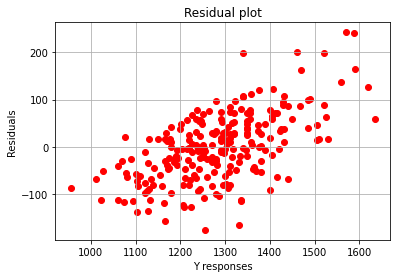

In [44]:
e_i_residuals_list = [] 
for i in range(n): #access each row from the data set 
  x_i = float(brainhead_data.iat[i,2]) #access element at X column
  y_i = float(brainhead_data.iat[i,3]) #access element at Y column

  y_pred_i = beta_1 * x_i + beta_0 #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list 

#plot the residuals e_i against the actual observations y_i
plt.scatter(anscombe_data_2['Brain weight'], e_i_residuals_list,color='r')
plt.title("Residual plot")
plt.xlabel("Y responses")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

Let us now compute the sample correlation.

In [45]:
#Note that sigma_XY and sigma_XX have already been computed. 
#Hence we will now compute sigma_YY

#Also note that y_bar is computed before

sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(brainhead_data.iat[i,2]) #access element at Y column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#Then we will compute the sample correlation
sample_correlation = sigma_xy/(np.sqrt(sigma_xx * sigma_yy))
print('sample correlation:',sample_correlation)

sigma_yy: 1341564450.2911386
sample correlation: 0.040356935407015584


Let us compute $R^2$. 

In [47]:
#Note that sum of squared residuals needs to be computed 

sum_sq_residuals = 0
for i in range(n): #access each row from the data set 
  x_i = float(brainhead_data.iat[i,2]) #access element at X column
  y_i = float(brainhead_data.iat[i,3]) #access element at Y column
  y_pred_i = beta_1*x_i + beta_0
  sum_sq_residuals += (y_i-y_pred_i)**2

print('sum of squared residuals:', sum_sq_residuals)

#Then we will compute the R^2 quantity
R_sq = 1-sum_sq_residuals/sigma_yy
print('R^2:',R_sq)

sum of squared residuals: 1232728.0146365522
R^2: 0.999081126505425


$\Large{\text{Exercises:}}$


1.   Try to use data sets from $\text{anscombe}\_\text{data}\_\text{3.txt}$ and $\text{anscombe}\_\text{data}\_\text{4.txt}$ and find the linear regression model for these data sets. Summarize your findings.  

2.   Consider the data from http://users.stat.ufl.edu/~winner/data/brainhead.dat and the corresponding data description from http://users.stat.ufl.edu/~winner/data/brainhead.txt. Choose the predictor variable to be $\textit{head size}$ and the $\textit{brain weight}$ to be response variable. Use linear regression to model the relationship between head size and brain weight. Explain your findings. 

